# CORAL and Interesting links
    - Corpus site: https://oraal.uoregon.edu/coraal
    - Elements of AAE english: http://lingtools.uoregon.edu/coraal/examples/AALexamples.php
    - Padroes linguisticos: https://oraal.uoregon.edu/AAL/Linguistic-Patterns
    
Como podemos obeservar que alem de existirem varios padroes orais, existem diferentes padroes gramaticais e de construção é muito plausivel que o perspective consiga observar tais diferenças.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import warnings
import tqdm
import glob

warnings.filterwarnings("ignore")

filepaths = yaml.safe_load(open("../config/filepaths.yaml"))

In [2]:
metadata = pd.concat([pd.read_csv(metadata_filepath, delimiter='\t') for metadata_filepath in glob.glob(filepaths['coraal_original_metadata']+'*')])
metadata.head()

,CORAAL.Sub,Version.Created,Version.Modified,CORAAL.Spkr,CORAAL.File,Audio.Folder,Tarball,Primary.Spkr,SLAAP.Collection,SLAAP.Spkr,...,Dig.Bit.Rate,Dig.Channels,CORAAL.Length.of.Transcript,CORAAL.Word.Count,Is.Misc.Tier,Notes,Region.in.City,LOR,LOR.Percent,Relationship.To.Others.In.Corpus
0,VLD,v.2021.07,NaN,VLD_se0_ag2_f_01,VLD_se0_ag2_f_01_1,VLD_wav_part01,VLD_audio_part01_2021.07.tar.gz,yes,sga,sga011,...,16 bit,Mono,3885.4,10676,NaN,NaN,NaN,NaN,NaN,NaN
1,VLD,v.2021.07,NaN,VLD_se0_ag2_f_02,VLD_se0_ag2_f_01_2,VLD_wav_part01,VLD_audio_part01_2021.07.tar.gz,yes,sga,sga012,...,16 bit,Mono,3508.1,10477,NaN,NaN,NaN,NaN,NaN,NaN
2,VLD,v.2021.07,NaN,VLD_se0_ag2_m_01,VLD_se0_ag2_m_01_1,VLD_wav_part01,VLD_audio_part01_2021.07.tar.gz,yes,sga,sga009,...,16 bit,Mono,3309.0,10942,NaN,NaN,NaN,NaN,NaN,NaN
3,VLD,v.2021.07,NaN,VLD_se0_ag3_f_01,VLD_se0_ag3_f_01_1,VLD_wav_part02,VLD_audio_part02_2021.07.tar.gz,yes,sga,sga002,...,16 bit,Mono,2766.8,8660,NaN,NaN,NaN,NaN,NaN,NaN
4,VLD,v.2021.07,NaN,VLD_se0_ag3_f_01,VLD_se0_ag3_f_01_2,VLD_wav_part02,VLD_audio_part02_2021.07.tar.gz,yes,sga,sga002,...,16 bit,Mono,296.8,848,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = pd.DataFrame()

for textfile in tqdm.tqdm(glob.glob(filepaths['coraal_original_textfiles']+'*')):
    df = pd.read_csv(textfile, delimiter='\t')
    df['CORAAL.File'] = textfile.split('/')[-1].split('.')[0]
    data = data.append(df,ignore_index=True)
data

100%|██████████| 142/142 [00:01<00:00, 72.49it/s]


,Line,Spkr,StTime,Content,EnTime,CORAAL.File
0,1,DCB_int_01,0.2851,Were you-,0.6613,DCB_se1_ag4_f_01_1
1,2,DCB_int_01,0.6613,(pause 0.08),0.7413,DCB_se1_ag4_f_01_1
2,3,DCB_int_01,0.7413,were you born and raised in DC?,2.2173,DCB_se1_ag4_f_01_1
3,4,DCB_se1_ag4_f_01,2.3234,Mm-hm.,2.7716,DCB_se1_ag4_f_01_1
4,5,DCB_int_01,3.5360,What [neighborhood?],4.2563,DCB_se1_ag4_f_01_1
...,...,...,...,...,...,...
282450,608,DCB_se3_ag4_m_02,667.0460,t- to lose that,668.1079,DCB_se3_ag4_m_02_4
282451,609,DCB_se3_ag4_m_02,668.1079,(pause 0.29),668.3981,DCB_se3_ag4_m_02_4
282452,610,DCB_se3_ag4_m_02,668.3981,"is, um,",669.4316,DCB_se3_ag4_m_02_4
282453,611,DCB_se3_ag4_m_02,669.4316,(pause 2.03),671.4603,DCB_se3_ag4_m_02_4


In [4]:
#remove all sentences inside parentheses (e.g. (1) and (one two) etc.)
def remove_tags(sentence, tag=['(', ')']):
    inside_parentesis = False
    result = ''
    for c in sentence:
        if c == tag[0]:
            inside_parentesis = True
        elif c == tag[1]:
            inside_parentesis = False
        elif not inside_parentesis:
            result += c
    return result

coraal_data = data[data.Spkr.isin(metadata['CORAAL.Spkr'].unique())]

sentences = coraal_data.groupby('Spkr')['Content'].apply(' '.join).reset_index()

sentences['processed'] = sentences['Content']
sentences['processed'] = sentences['processed'].str.replace('/unintelligible/','')
sentences['processed'] = sentences['processed'].str.replace('/inaudible/','')
sentences['processed'] = sentences['processed'].str.replace('/','')
sentences['processed'] = sentences['processed'].str.replace('\[|\]','')
sentences['processed'] = sentences['processed'].str.replace('- ',' ')
sentences['processed'] = sentences['processed'].apply(lambda x: remove_tags(x))
sentences['processed'] = sentences['processed'].apply(lambda x: remove_tags(x,tag=['<', '>']))

sentences['processed'] = sentences['processed'].str.replace('!','.').str.replace('?','.').str.split('.').apply(lambda x: [s.lstrip().rstrip() for s in x])

sentences = sentences.explode('processed')
sentences = sentences[sentences['processed'].str.len() > 0].reset_index(drop=True)

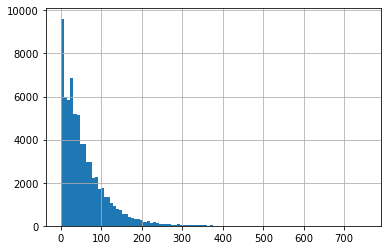

max len: 753
number of speakers: 108


In [5]:
sentences.processed.str.len().hist(bins=100)
plt.show()

print('max len:',sentences.processed.str.len().max())
print('number of speakers:',len(sentences.Spkr.unique()))

In [6]:
sentences = sentences.rename(columns={'processed':'text'})
d = {}
for spkr in sentences.Spkr.unique():
    d[spkr] = sentences[sentences.Spkr == spkr][['text']].reset_index(drop=True)

In [8]:
for spkr in d.keys():
    d[spkr].to_csv(filepaths['coraal_sentences']+spkr,index=False)